In [1]:
!pip install --upgrade pandas-profiling
!pip install ydata-profiling
!pip install ipywidgets
!pip install shap


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency, kruskal
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# library for sampling 
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import shap
%matplotlib inline

In [3]:
df = pd.read_csv("data.csv", delimiter=";") 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print("Number of duplicated:", len(df[df.duplicated()])) 

Number of duplicated: 12


In [5]:
# Print duplicated dataframe
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [6]:
 # Drop the duplicated rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [7]:
# Tidy up index after dropping rows
df = df.reset_index(drop=True)
print("Check duplicated rows after dropping rows  :", len(df[df.duplicated()])) 

Check duplicated rows after dropping rows  : 0


In [8]:
# Print information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [9]:
# Check categorical and numberical columns
for column_name in list(df.columns): # Loop
    print(column_name, df[column_name].dtype, df[column_name].unique()) # column_name datatype, unique column name values

age int64 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job object ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital object ['married' 'single' 'divorced' 'unknown']
education object ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default object ['no' 'unknown' 'yes']
housing object ['no' 'yes' 'unknown']
loan object ['no' 'yes' 'unknown']
contact object ['telephone' 'cellular']
month object ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week object ['mon' 'tue' 'wed' 'thu' 'fri']
duration int64 [ 261  149  226 ... 1246 1556 1868]
campaign int64 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 

In [10]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns) # categorical columns as object format
list_numeric_columns = list(df.select_dtypes(include=['float64','int64']).columns) # numeric columns as numeric format
target_column = "y"
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

41176
21
11
10


In [11]:
# Check null values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
# Remove the y target column to check dependent columns
list_categorical_columns.remove(target_column)

In [13]:
# Briefly describe the ratio
df[target_column].describe()

count     41176
unique        2
top          no
freq      36537
Name: y, dtype: object

In [14]:
# Check the number of response each
df[target_column].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

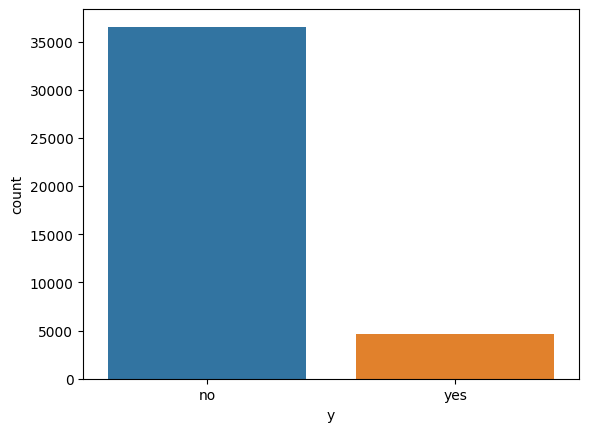

In [15]:
# Simply draw a viz with Seaborn
sns.countplot(x=target_column, data=df)

In [16]:
# Check if any column is not useful for the y target
df[list_categorical_columns].nunique().sort_values() 

contact         2
default         3
housing         3
loan            3
poutcome        3
marital         4
day_of_week     5
education       8
month          10
job            12
dtype: int64

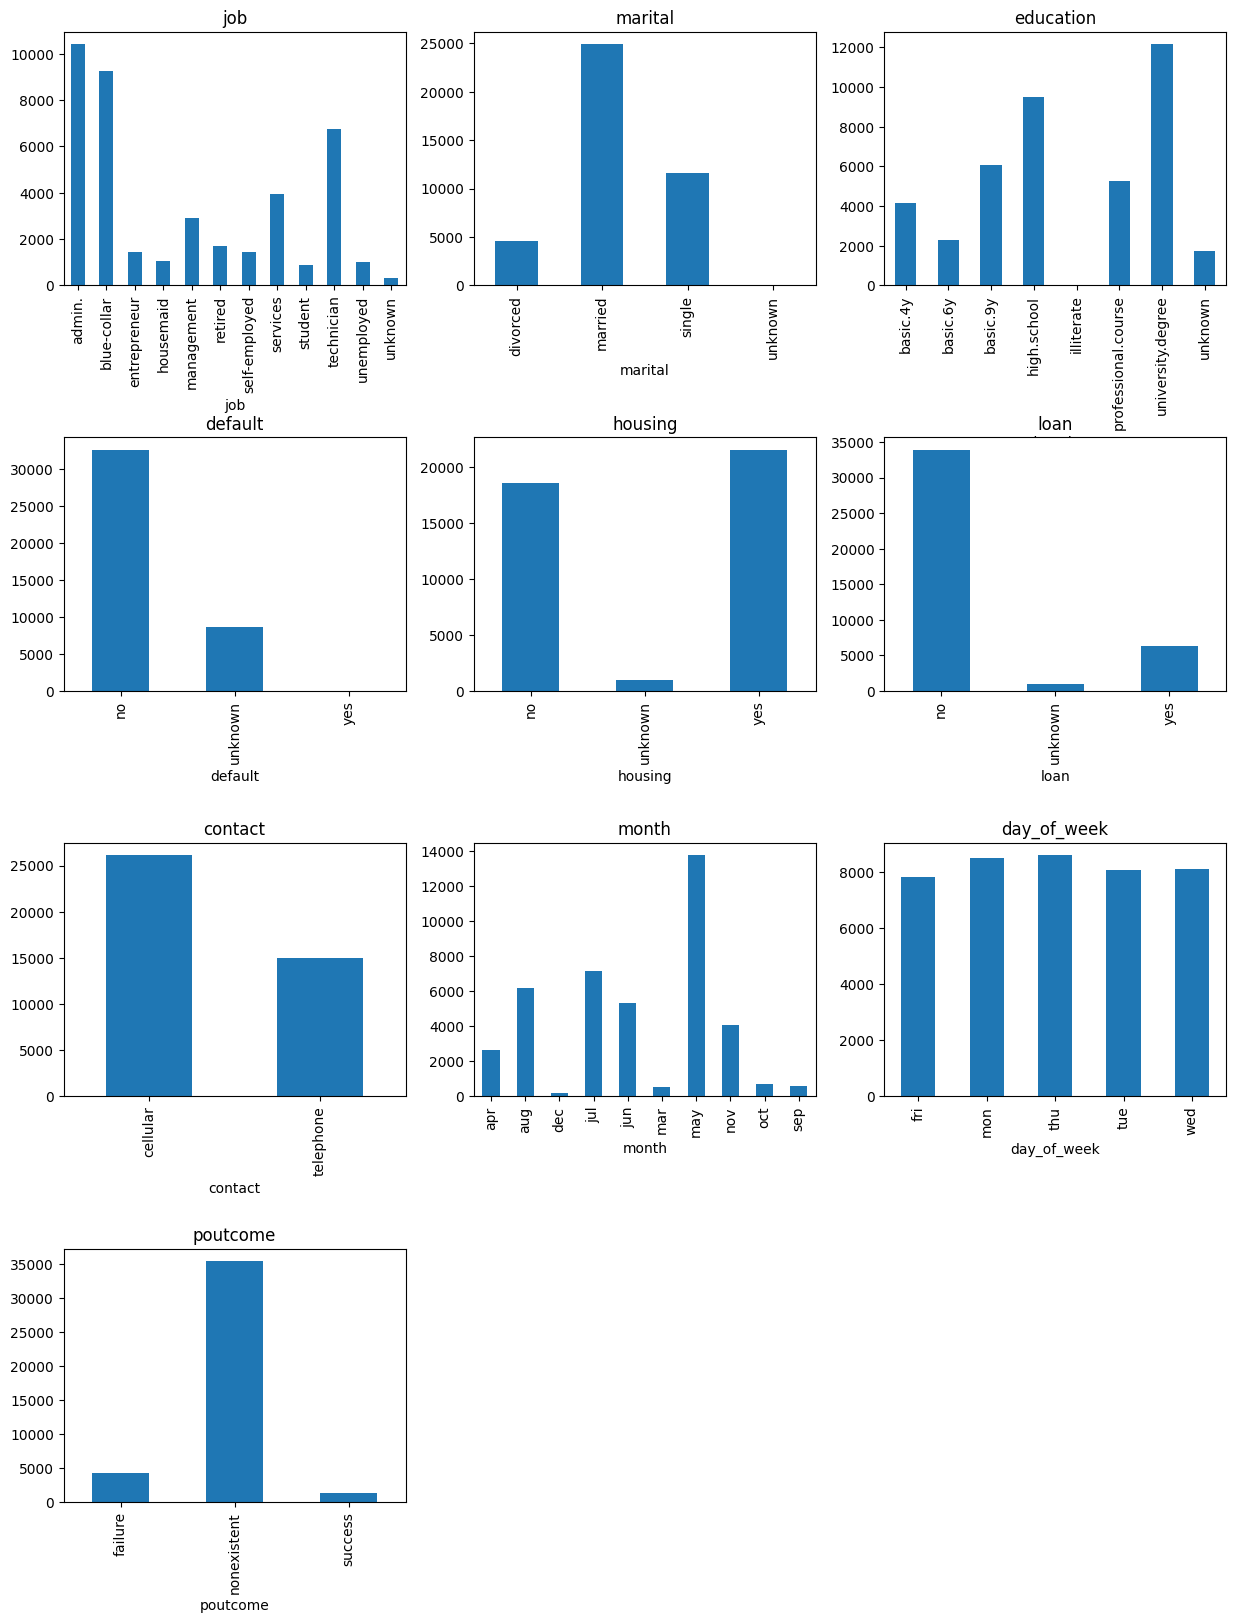

In [17]:
# Check cateogircla column ratio
plt.figure(figsize=(15,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.6, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(4,3,x)
    x = x+1
    df[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)
plt.show()

In [18]:
print(list_categorical_columns)
list_categorical_columns[9]

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


'poutcome'

poutcome  failure  nonexistent  success
y                                      
no           3647        32411      479
yes           605         3140      894


<Axes: xlabel='y'>

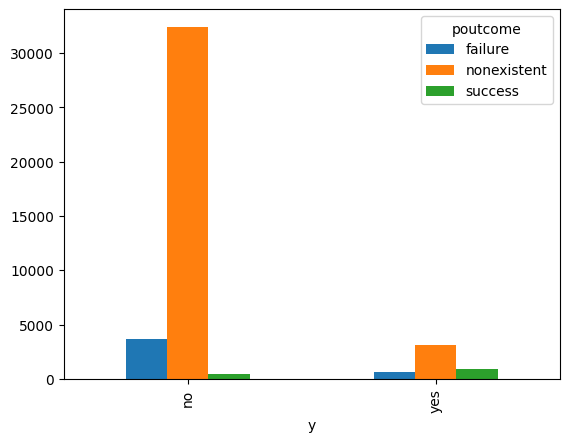

In [19]:
# categorical column과 dependent data(target column) Ratio
# No and Yes count ratio is not ideal for checking depdent data ratio
df_poutcome_dependent = pd.crosstab(df[target_column], df[list_categorical_columns[9]]) # poutcome
print(df_poutcome_dependent)
df_poutcome_dependent.plot(kind='bar')


In [20]:
pd.crosstab(df[target_column], df[list_categorical_columns[-1]], normalize="index")

poutcome,failure,nonexistent,success
y,,,
no,0.099817,0.887073,0.013110
yes,0.130416,0.676870,0.192714


<Axes: xlabel='y'>

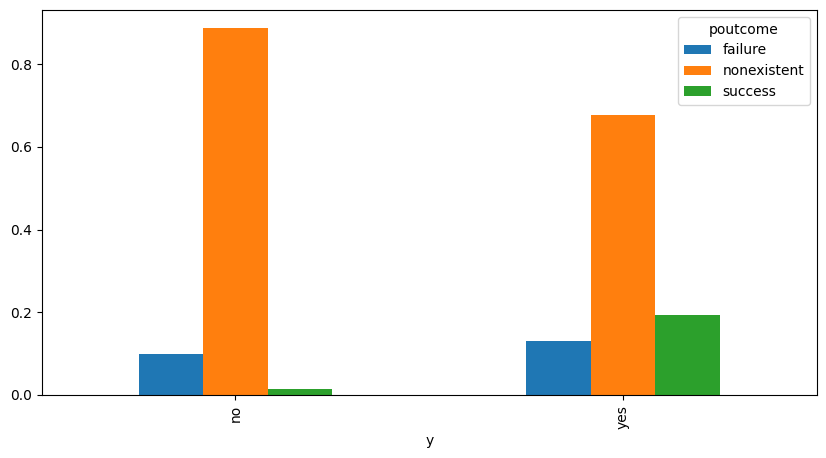

In [21]:
df_poutcome_dependent_ratio = pd.crosstab(df[target_column], df[list_categorical_columns[-1]], normalize="index") # Normalise the y counter, so we can see the ratio
df_poutcome_dependent_ratio.plot.bar(figsize=(10,5))


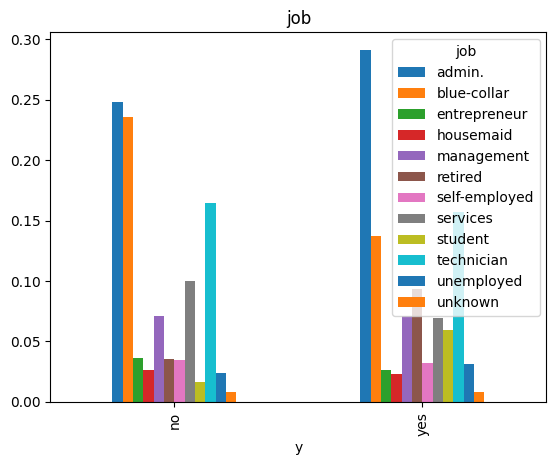

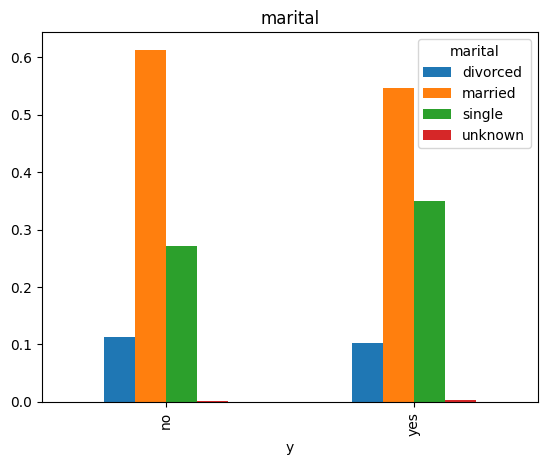

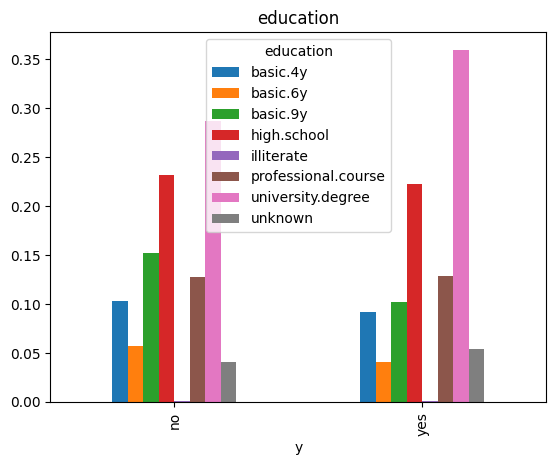

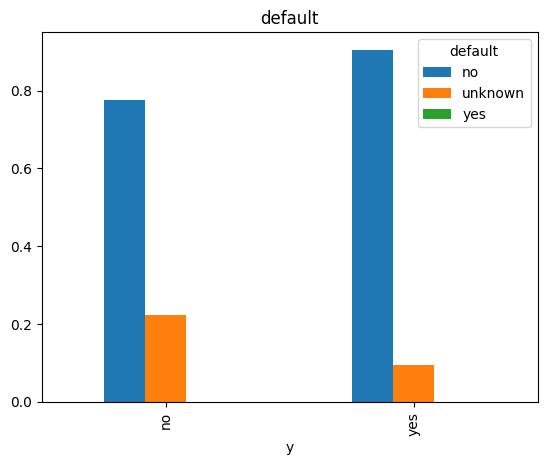

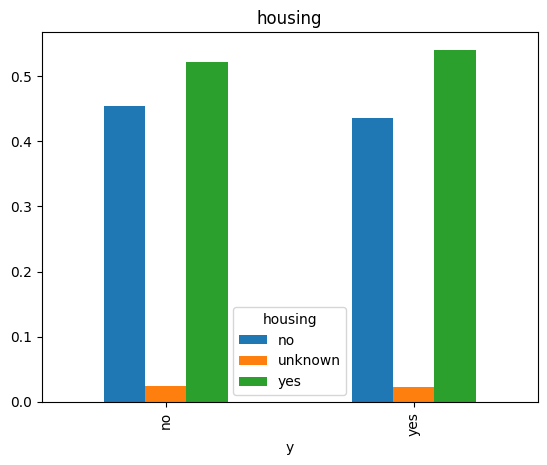

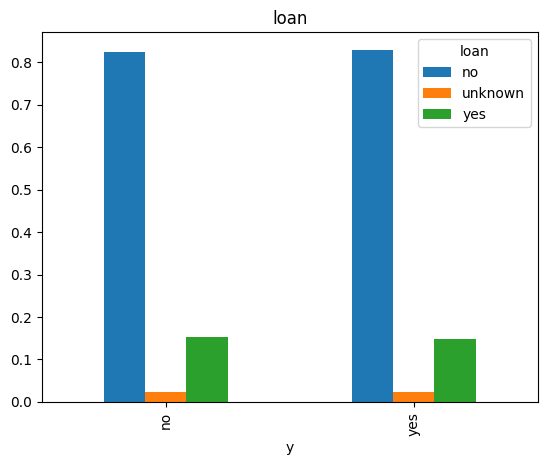

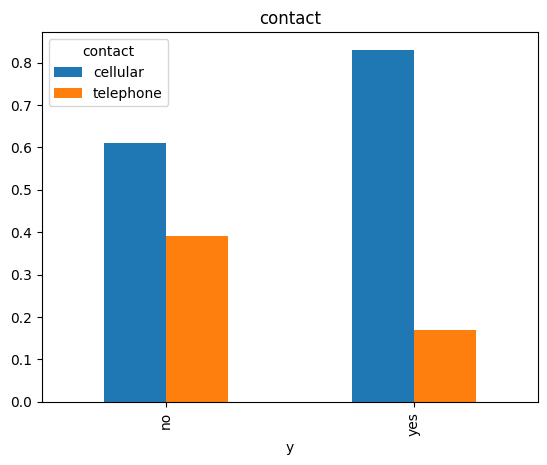

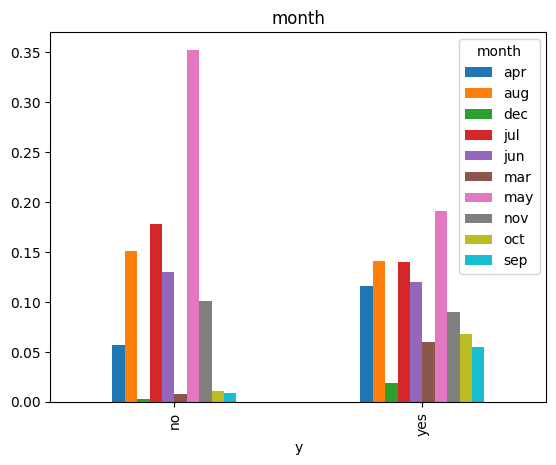

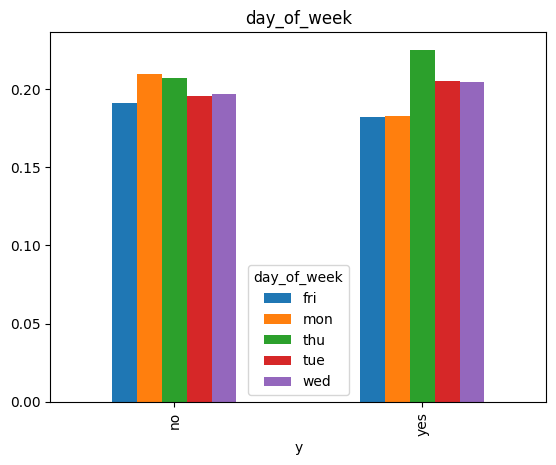

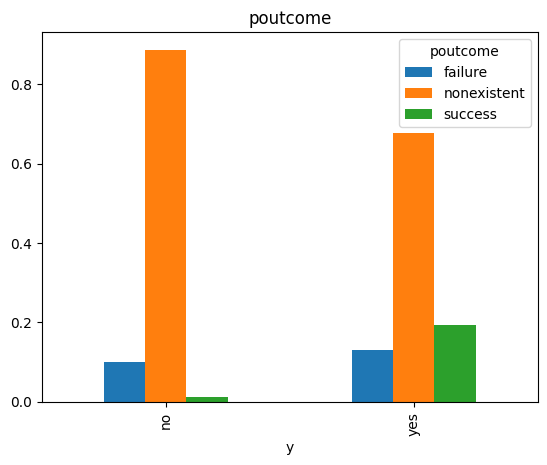

In [22]:
# Draw a ratio data plot
for column_name in list_categorical_columns: #each column_name
    pd.crosstab(df[target_column], df[column_name], normalize="index").plot.bar() #eadch column name and target variable crosstab and plot 
    plt.title(column_name)
plt.show()

In [23]:
# Chi Sqaure
list_meaningful_column_by_chi = []

for column_name in list_categorical_columns:
  statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df[target_column], df[column_name]))
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)
  print(column_name, statistic, pvalue)

print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

job 961.7438037353177 3.2684116066165443e-199
marital 122.95931379226256 1.778422500461116e-26
education 192.8485047401879 3.746768377534744e-38
default 406.5560941574606 5.217540893727963e-89
housing 5.742152842222754 0.05663792749452546
loan 1.0992950447716308 0.5771532081176227
contact 862.0807365848323 1.7187406241263767e-189
month 3103.032672105299 0.0
day_of_week 26.054243692750852 3.085754965631736e-05
poutcome 4230.14342770359 0.0
all categorical columns :  10
selected columns by chi :  8 ['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome']


In [24]:
# Check numerical columns 
df[list_numeric_columns].nunique().sort_values()

previous             8
emp.var.rate        10
nr.employed         11
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [25]:
df[list_numeric_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


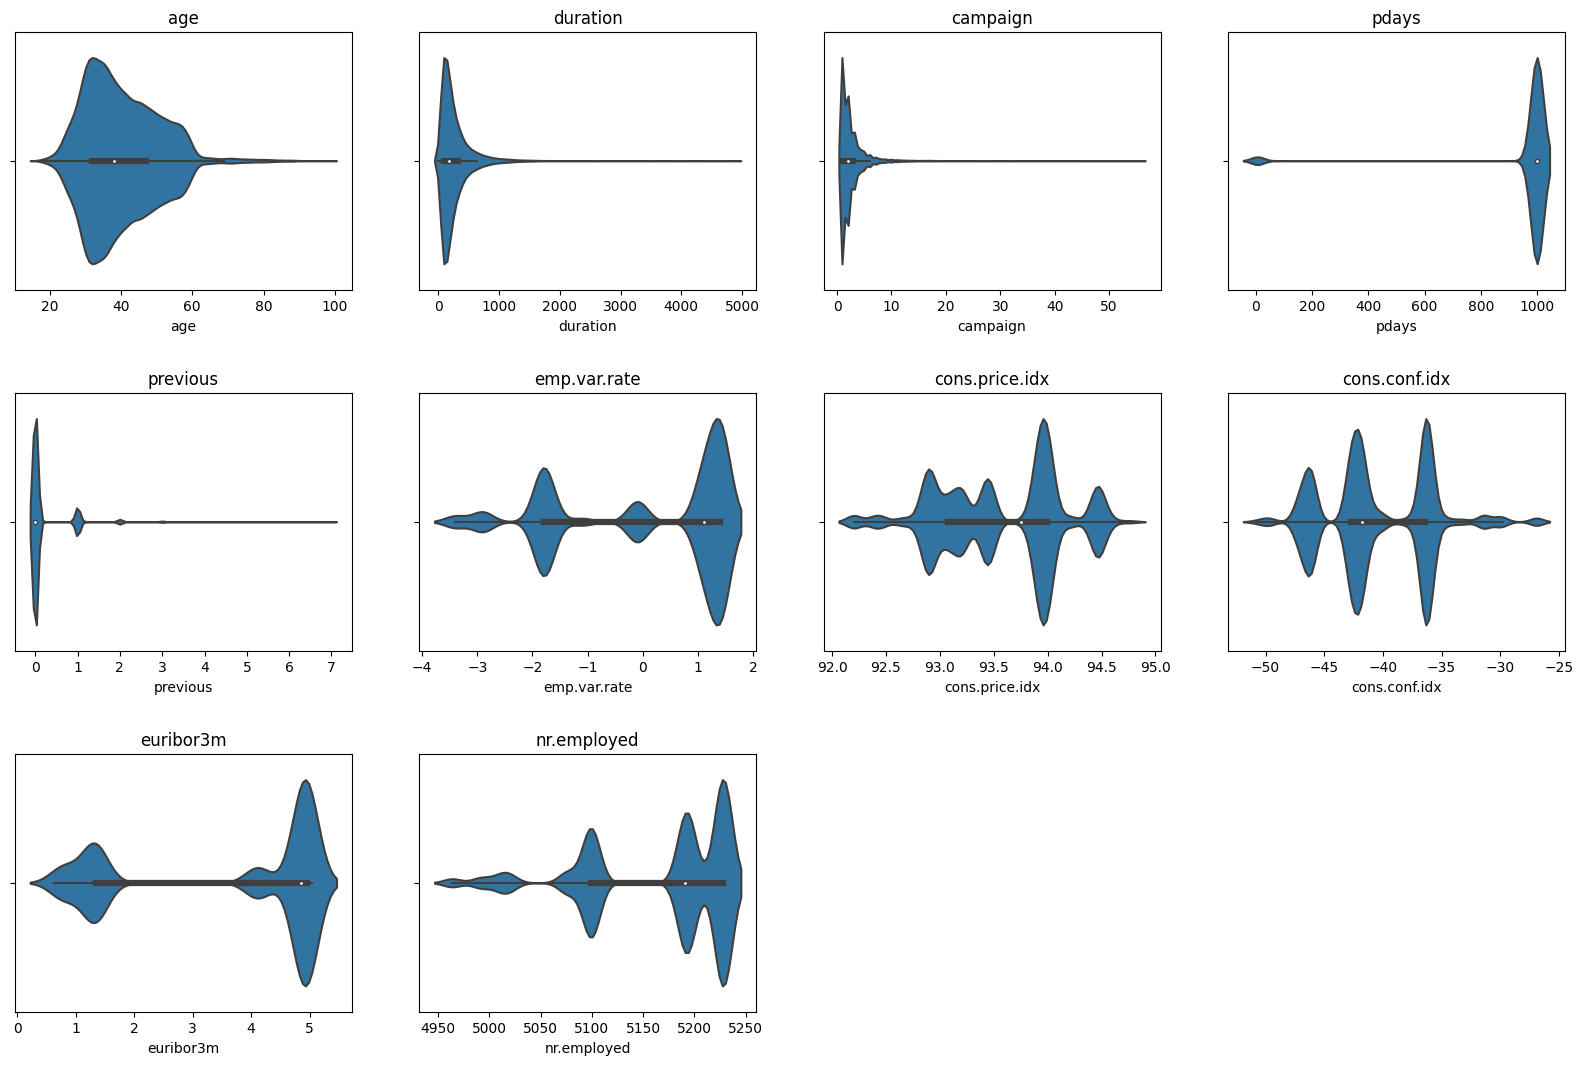

In [26]:
plt.figure(figsize=(20, 10))
x = 1

plt.subplots_adjust(top=0.99, bottom = 0.01, hspace = 0.4, wspace = 0.2)
for column_name in list_numeric_columns:
    plt.subplot(3,4,x)
    x = x +1
    sns.violinplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

In [27]:
for column_name in list_numeric_columns:
    print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]))

age skew :  0.7845316793906337 kur :  0.7908715485573286
duration skew :  3.2626886475171046 kur :  20.241167105999835
campaign skew :  4.76187058291751 kur :  36.96722235388976
pdays skew :  -4.921207099141221 kur :  22.21870880664178
previous skew :  3.8312559388497256 kur :  20.09957712427588
emp.var.rate skew :  -0.7240342146771608 kur :  -1.062714697365619
cons.price.idx skew :  -0.2308444969439891 kur :  -0.8298960161833482
cons.conf.idx skew :  0.3028649665515025 kur :  -0.3591991612497849
euribor3m skew :  -0.7091683770703301 kur :  -1.4067662115952242
nr.employed skew :  -1.0442790133772375 kur :  -0.0036849526898108387


<Axes: >

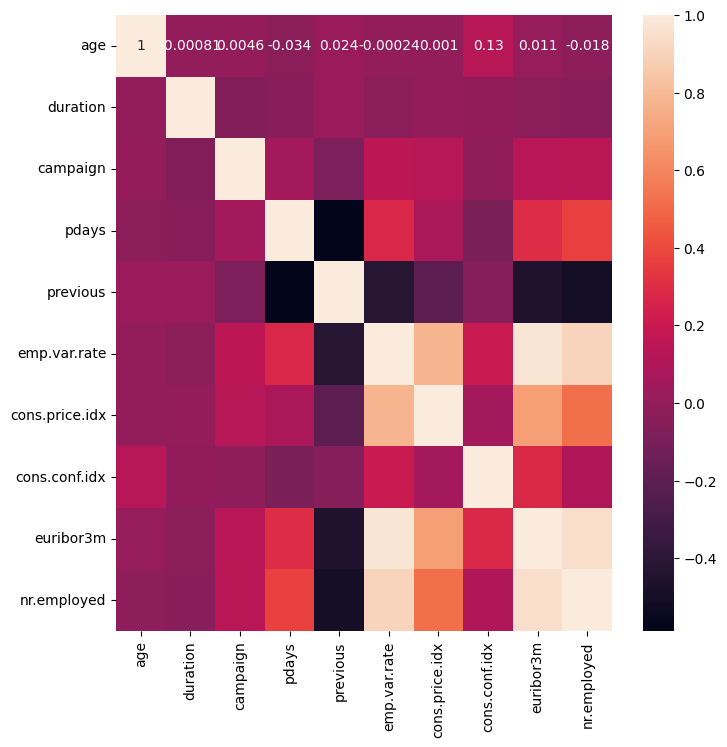

In [28]:
df_corr = df[list_numeric_columns].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True)

In [29]:
# emp.var.rate - euribor3m
# nr.employed - emp.var.rate
# emp.var.rate - cons.price.idx

index_corr_over_75 = np.where((abs(df_corr)>0.75) & (df_corr != 1))
index_corr_over_75

(array([5, 5, 5, 6, 8, 8, 9, 9], dtype=int64),
 array([6, 8, 9, 5, 5, 9, 5, 8], dtype=int64))

In [30]:
len_corr_over_75 = len(index_corr_over_75[0])
left_columns = df_corr.columns[index_corr_over_75[0]]
right_columns = df_corr.columns[index_corr_over_75[1]]
for index in range(len_corr_over_75):
    print(left_columns[index], "<->", right_columns[index])

emp.var.rate <-> cons.price.idx
emp.var.rate <-> euribor3m
emp.var.rate <-> nr.employed
cons.price.idx <-> emp.var.rate
euribor3m <-> emp.var.rate
euribor3m <-> nr.employed
nr.employed <-> emp.var.rate
nr.employed <-> euribor3m


In [31]:
list_not_valid = []
for index in range(len_corr_over_75):
    statistic, pvalue = stats.pearsonr(df.loc[:,left_columns[index]], df.loc[:,right_columns[index]])
    print("%s<->%s : %f %f"%(left_columns[index], right_columns[index], statistic, pvalue))
    if (pvalue > 0.05):
        list_not_valid.append(column_name)
print("end")
print(len(list_not_valid), " is not valid")

emp.var.rate<->cons.price.idx : 0.775293 0.000000
emp.var.rate<->euribor3m : 0.972244 0.000000
emp.var.rate<->nr.employed : 0.906949 0.000000
cons.price.idx<->emp.var.rate : 0.775293 0.000000
euribor3m<->emp.var.rate : 0.972244 0.000000
euribor3m<->nr.employed : 0.945146 0.000000
nr.employed<->emp.var.rate : 0.906949 0.000000
nr.employed<->euribor3m : 0.945146 0.000000
end
0  is not valid


In [32]:
list_removed_by_correlation = ["emp.var.rate", "euribor3m"]

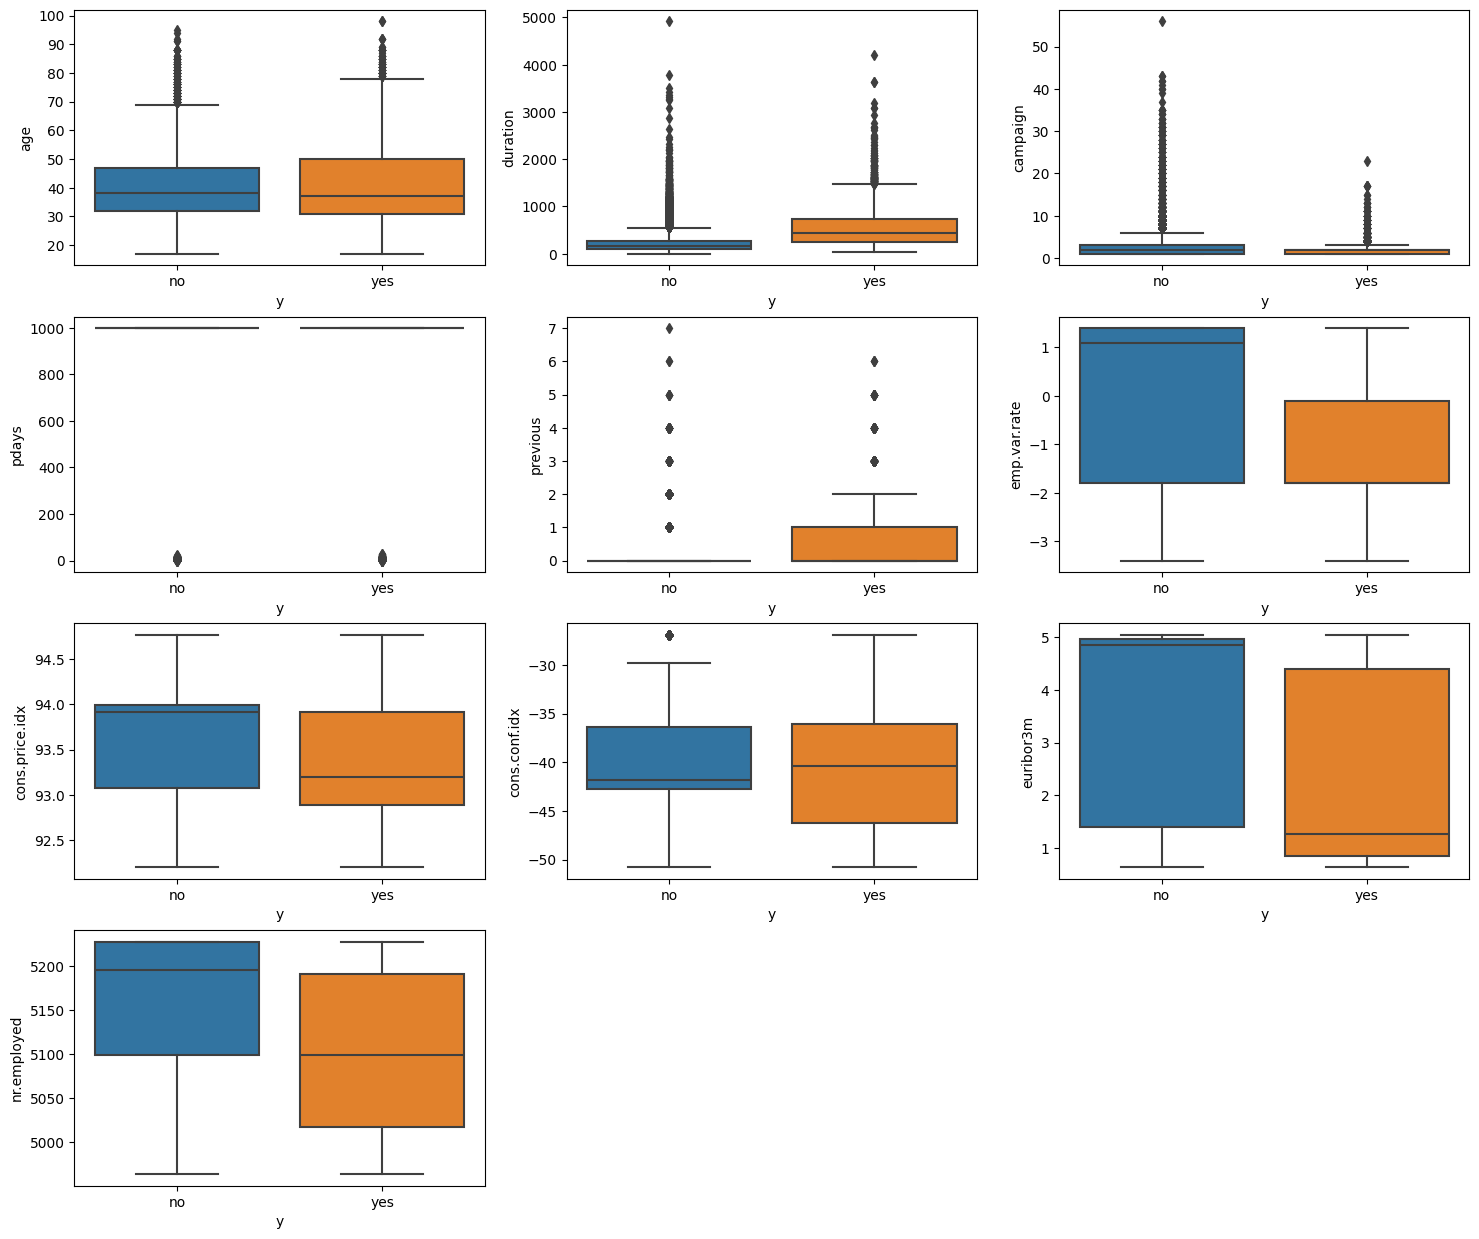

In [33]:
plt.figure(figsize=(18,12))
x = 1
plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 0.2, wspace = 0.2)
for column_name in list_numeric_columns:
    plt.subplot(4,3,x)
    x = x +1
    sns.boxplot(data=df, x=target_column, y=column_name)
plt.show()

In [34]:
# ANOVA - numeric data distribution test
# Normality, Equality of Variance, Independency
# Target y - numeric column data distribution
# pvalue 0.05 - reject null hypothesis : Population distribution is following normality distribution
# Testing - QQplot, Shapiro-Wilks Test

## Normality Test

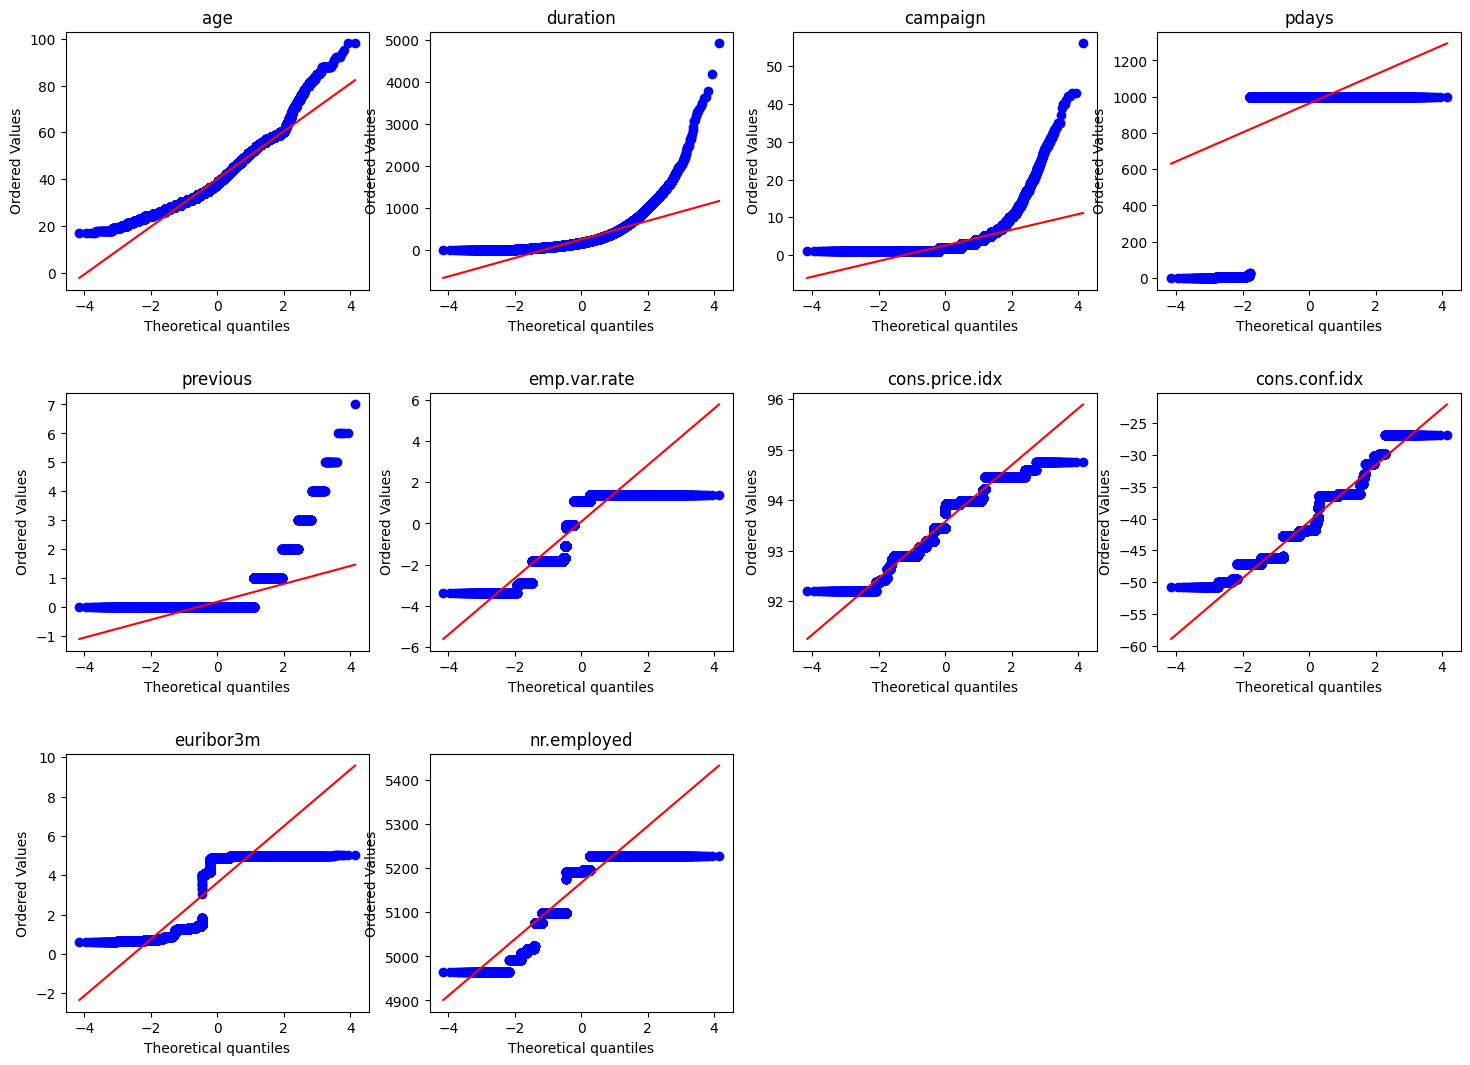

In [35]:
# Numeric column data Normality test
plt.figure(figsize=(18,10))
x = 1
plt.subplots_adjust(top= 0.99, bottom = 0.01, hspace= 0.4, wspace= 0.2)
for column_name in list_numeric_columns:
    plt.subplot(3,4,x)
    x = x+1

    stats.probplot(df[column_name], dist=stats.norm, plot=plt)

    plt.title(column_name)
plt.show()

In [36]:
list_column_normality = []
for column_name in list_numeric_columns:
    statistic, pvalue = stats.shapiro(df[column_name])
    if pvalue > 0.05:
        list_column_normality.append(column_name)
    print(column_name, ", statistic :", statistic, ", pvalue: ", pvalue)
print("Column passing Normality test : ", len(list_column_normality))


age , statistic : 0.9572796821594238 , pvalue:  0.0
duration , statistic : 0.7216830849647522 , pvalue:  0.0
campaign , statistic : 0.5578689575195312 , pvalue:  0.0
pdays , statistic : 0.1829797625541687 , pvalue:  0.0
previous , statistic : 0.39130860567092896 , pvalue:  0.0
emp.var.rate , statistic : 0.7621634006500244 , pvalue:  0.0
cons.price.idx , statistic : 0.933931827545166 , pvalue:  0.0
cons.conf.idx , statistic : 0.9238575100898743 , pvalue:  0.0
euribor3m , statistic : 0.6863111853599548 , pvalue:  0.0
nr.employed , statistic : 0.7877941727638245 , pvalue:  0.0
Column passing Normality test :  0


c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Kruskall-Wallis Test

In [37]:
list_meaningful_column_by_kruskall = [] # meaningfull columns after kruskall testing
list_target_unique = df[target_column].unique() # yes, no
print("list_target_unique:", list_target_unique)

for column_name in list_numeric_columns: # each column name from list numeric columns
    list_by_target_value = [] # list by target value?
    for target_value in list_target_unique: # Yes, no. if Yes
        df_tmp = df[df[target_column]==target_value][column_name].dropna() # if target column is no, get column_names and drop null.
        print(df_tmp)
        list_by_target_value.append(np.array(df_tmp))
    statistic, pvalue = kruskal(*list_by_target_value)
    if pvalue <= 0.05:
        list_meaningful_column_by_kruskall.append(column_name)
    print(column_name, ", ", statistic, ", ", pvalue)
print("all numerical columns : ", len(list_numeric_columns))
print("selected columns by kruskall : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

list_target_unique: ['no' 'yes']
0        56
1        57
2        37
3        40
4        56
         ..
41168    36
41170    29
41172    46
41173    56
41175    74
Name: age, Length: 36537, dtype: int64
75       41
83       49
88       49
129      41
139      45
         ..
41162    62
41166    62
41169    37
41171    73
41174    44
Name: age, Length: 4639, dtype: int64
age ,  5.843156420996497 ,  0.015637749222475184
0        261
1        149
2        226
3        151
4        307
        ... 
41168    254
41170    112
41172    383
41173    189
41175    239
Name: duration, Length: 36537, dtype: int64
75       1575
83       1042
88       1467
129       579
139       461
         ... 
41162     208
41166     483
41169     281
41171     334
41174     442
Name: duration, Length: 4639, dtype: int64
duration ,  5008.952641567334 ,  0.0
0        1
1        1
2        1
3        1
4        1
        ..
41168    2
41170    1
41172    1
41173    2
41175    3
Name: campaign, Length: 36537, dtyp

## EDA with Pandas_profiling

In [38]:
from ydata_profiling import ProfileReport
report = ProfileReport(df, title= "data_eda_with_pandasprofiling")
report.to_file("data_eda_with_pandasprofiling.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'telephone'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Insight
- Final columns selection : 17
- Numerical columns : 8
- Categorical columns : 9

In [39]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Feature Seleection
- Categorical columns passing Chi
- Numerical columns passing Kruskall
- Remove numerical columns having high correlation

In [40]:
list_selected_numerical = list_meaningful_column_by_kruskall.copy() # 8 out of 10 selected
for column_name in list_removed_by_correlation: 
    list_selected_numerical.remove(column_name)
list_selected_numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

In [41]:
df_fs = df[list_meaningful_column_by_chi + list_selected_numerical + [target_column]]
df_fs.head(2)

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,56,261,1,999,0,93.994,-36.4,5191.0,no
1,services,married,high.school,unknown,telephone,may,mon,nonexistent,57,149,1,999,0,93.994,-36.4,5191.0,no


In [42]:
Y = df_fs[target_column]
X = df_fs.drop([target_column], axis=1)

In [43]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
41171    yes
41172     no
41173     no
41174    yes
41175     no
Name: y, Length: 41176, dtype: object

In [44]:
le = LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

In [45]:
Y_encoded

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
le.inverse_transform(Y_encoded)

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

### Feature Scaling
- Standardization / MinMaxScaling
- MinMaxScaling [0,1] Scaling - Sklearn.MinMaxScaler()
- Standardization using Normality - Sklearn.StandardScaler()

In [47]:
list_categorical_columns = list(df_fs.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df_fs.select_dtypes(include=['float64', 'int64']).columns)
print(len(list_categorical_columns))
print(len(list_numeric_columns))

9
8


In [48]:
df_fs.head(1)

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,56,261,1,999,0,93.994,-36.4,5191.0,no


In [49]:
scaler = MinMaxScaler()
X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
X.head(1)

C:\Users\TaeyoonKim\AppData\Local\Temp\ipykernel_97064\1840126398.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.48148148 0.49382716 0.24691358 ... 0.48148148 0.33333333 0.7037037 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
C:\Users\TaeyoonKim\AppData\Local\Temp\ipykernel_97064\1840126398.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.05307035 0.03029687 0.04595364 ... 0.03843026 0.08987393 0.04859699]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
C:\Users\TaeyoonKim\AppData\Local\Temp\ipykernel_97064\1840126398.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,0.481481,0.05307,0.0,1.0,0.0,0.698753,0.60251,0.859735


In [50]:
X_base = pd.get_dummies(X)
X_base.head(1)

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.05307,0.0,1.0,0.0,0.698753,0.60251,0.859735,False,False,...,False,False,False,True,False,False,False,False,True,False


### Sampling
- Oversamping/ Combinedsampling/ Model Optimsation
- SMOTE : Synthetic Minority Over-Sampling Technique. Minority class - Synthetic smapling. Some minority class A - KNN near minority class Set K generation, A and Set K new observation.
- SVMSMOTE, SMOTEENN

In [51]:
X_train, X_validation, y_train, y_validation = train_test_split(X_base, Y_encoded, test_size=0.2, stratify=Y_encoded)

### SMOTE

In [52]:
sm = SMOTE(random_state=42)
X_sm_sampling, y_sm_sampling = sm.fit_resample(X_train, y_train)

c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'After sampling for target label')

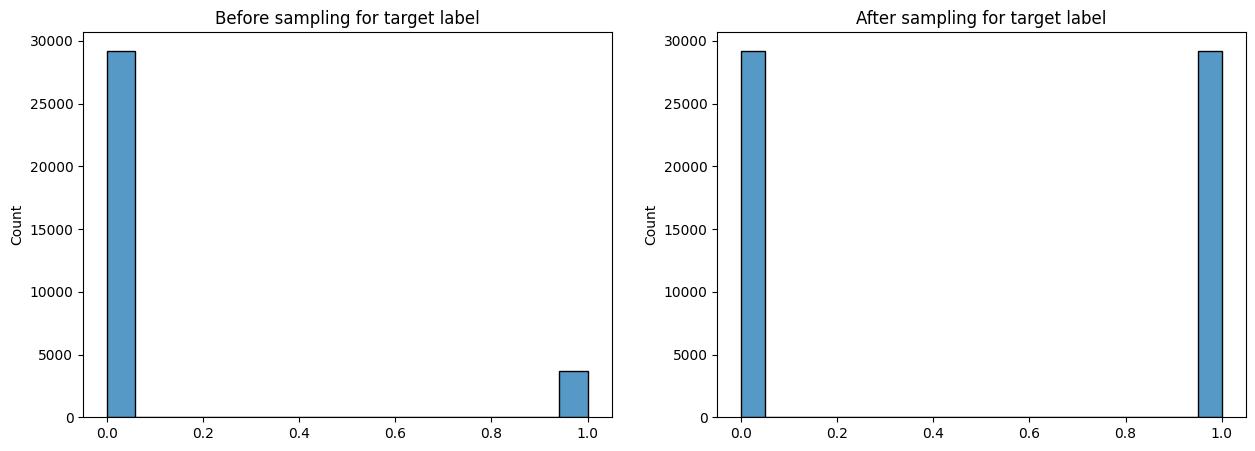

In [53]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_sm_sampling)
plt.title("After sampling for target label")

Text(0.5, 1.0, 'After sampling for target label')

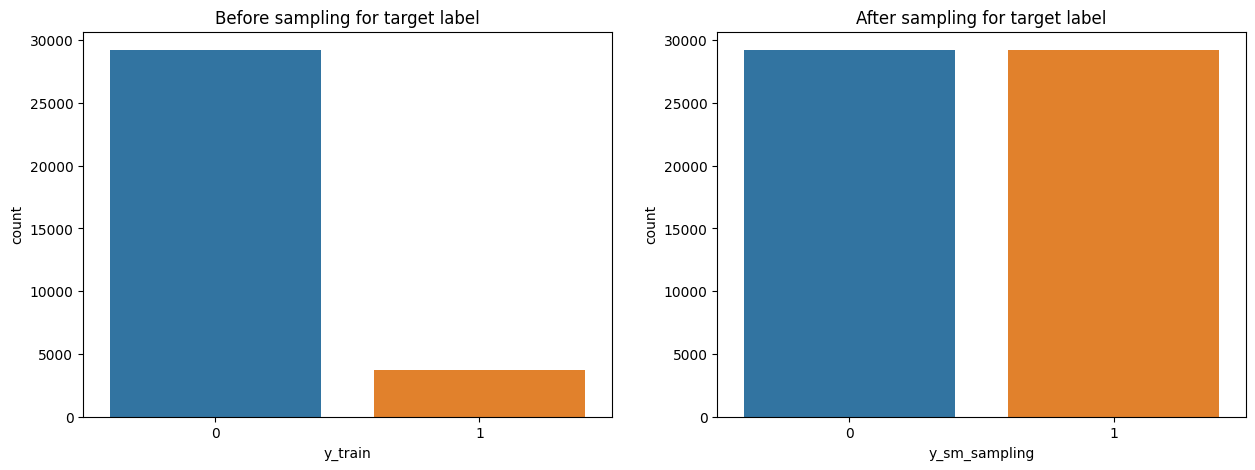

In [54]:
dff = pd.DataFrame()
dff['y_train'] = y_train
dfff = pd.DataFrame()
dfff['y_sm_sampling'] = y_sm_sampling


fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(x = 'y_train', data = dff)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.countplot(x = 'y_sm_sampling', data = dfff)
plt.title("After sampling for target label")

### SVMSMOTE

In [55]:
svm_sm = SVMSMOTE(random_state=42)
X_svm_sampling, y_svm_sampling = svm_sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

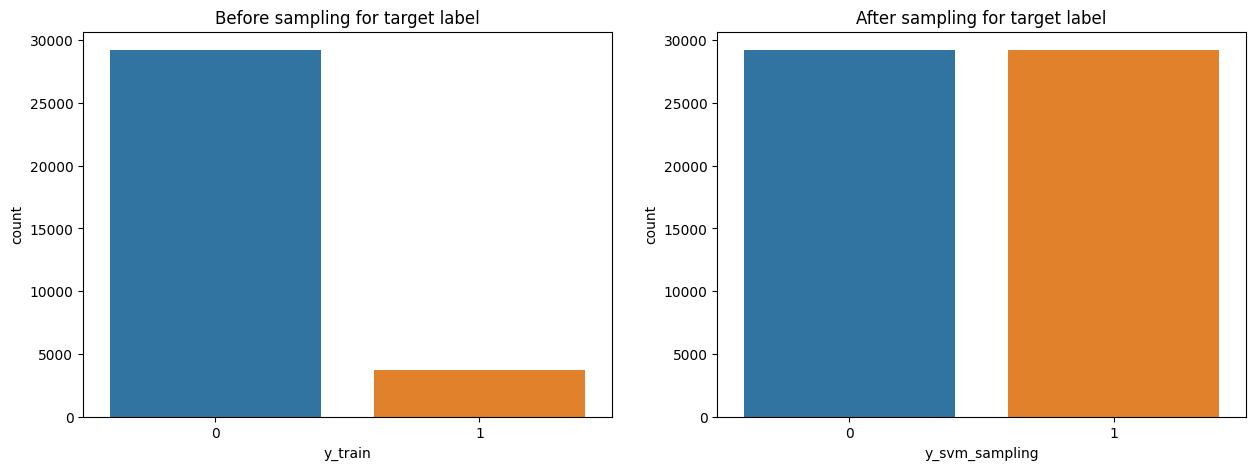

In [56]:
dff = pd.DataFrame()
dff['y_train'] = y_train
dfff = pd.DataFrame()
dfff['y_svm_sampling'] = y_sm_sampling

fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(x = 'y_train', data = dff)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.countplot(x = 'y_svm_sampling', data = dfff)
plt.title("After sampling for target label")

### SVMSMOTE

In [57]:
svm_sm = SVMSMOTE(random_state=42)
X_svm_sampling, y_svm_sampling = svm_sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

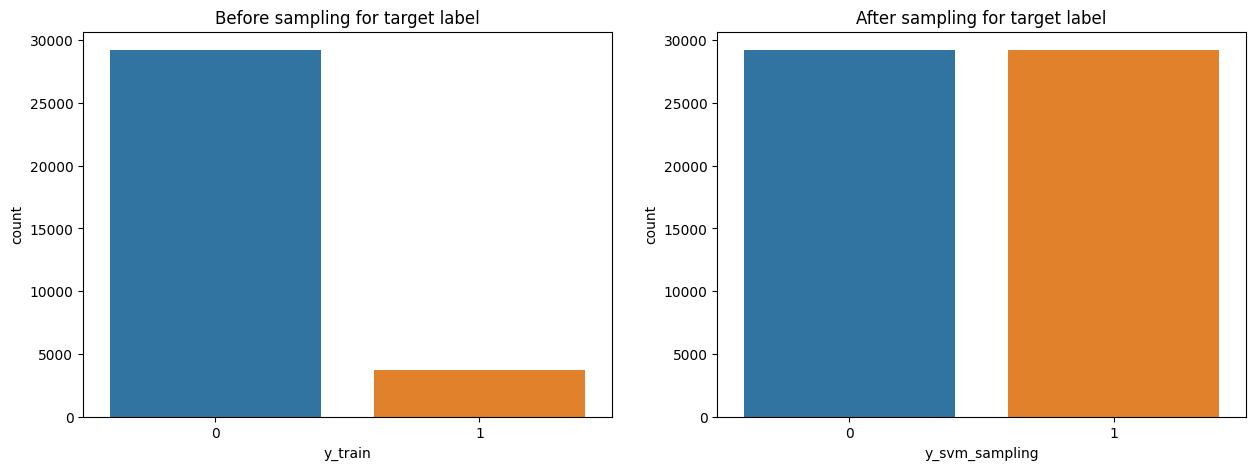

In [58]:
dff = pd.DataFrame()
dff['y_train'] = y_train
dfff = pd.DataFrame()
dfff['y_svm_sampling'] = y_sm_sampling

fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(x = 'y_train', data = dff)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.countplot(x = 'y_svm_sampling', data = dfff)
plt.title("After sampling for target label")

In [59]:
combined_sm = SMOTEENN(random_state=42)
X_csm_sampling, y_csm_sampling = combined_sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

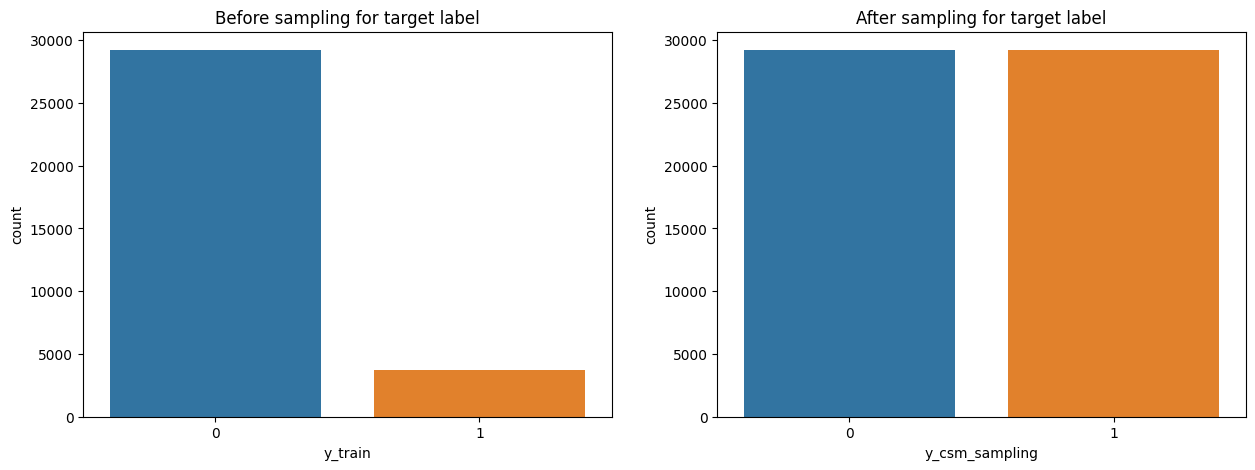

In [62]:
dff = pd.DataFrame()
dff['y_train'] = y_train
dfff = pd.DataFrame()
dfff['y_csm_sampling'] = y_sm_sampling

fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(x = 'y_train', data = dff)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.countplot(x = 'y_csm_sampling', data = dfff)
plt.title("After sampling for target label")

### Final Summary
Final features
1. Feature Selection by Chi-test, correlation and Kruskal-test
2. Feature Transformation
3. Sampling (oversampling, combinedsampling)

Features
1. X_base, Y_encoded(No sampling, imbalanced data)
2. X_sm_sampling, Y_sm_sampling (SMOTE oversampling)
3. X_svm_sampling, Y_svm_sampling (SVMOTE oversampling)
4. X_csm_sampling, y_csm_sampling (SMOTEENN combinedsampling)

Models

1. Base model without sampling
2. Model optimisation with base feature
3. Model optimisation with SMOTE oversampling
4. Model optimisation with SVMOTE oversampling
5. Model optimisation with SMOTEENN combined sampling

In [63]:
list_model_type = []
list_model_best_params = []
list_model_f1_score = []
cv = 3
n_iter_randomsearch = 40

### Base model without sampling

In [68]:
# Unbalanced dataset - stratified sampling with KFold valdiation
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X_base, Y_encoded)

3

In [84]:
list_fold_result = [] 
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    print(i)
    print("train_index: ", train_index) # train value index only
    print("test_index: ", test_index) 
    X_train_cv, X_test_cv = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
    print("X_train_cv: ", X_train_cv.head())
    print("X_test_cv: ", X_test_cv.head())
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    rf_clf = MLPClassifier(hidden_layer_sizes=10)
    rf_clf.fit(X_train_cv, y_train_cv)
    y_prd_test = rf_clf.predict(X_test_cv)
    y_prd_proba_test = rf_clf.predict_proba(X_test_cv)[:,-1]
    prf_score_test = precision_recall_fscore_support(y_test_cv, y_prd_test, average='macro')
    score_test = roc_auc_score(y_test_cv, y_prd_proba_test, average='macro')
    print(i, " precision, recall, f1score : ", prf_score_test)
    print(i, " roc_auc_score : ", score_test)

    y_prd_validation = rf_clf.predict(X_validation)
    y_prd_proba_validation = rf_clf.predict_proba(X_validation)[:,-1]
    prf_score_validation_binary = precision_recall_fscore_support(y_validation, y_prd_validation, average='binary')
    prf_score_validation_micro = precision_recall_fscore_support(y_validation, y_prd_validation, average='micro')
    prf_score_validation_macro = precision_recall_fscore_support(y_validation, y_prd_validation, average='macro')
    prf_score_validation_weighted = precision_recall_fscore_support(y_validation, y_prd_validation, average='weighted')
    score_validation = roc_auc_score(y_validation, y_prd_proba_validation, average='macro')
    print("validation : precision, recall, f1score binary : ",prf_score_validation_binary)
    print("validation : precision, recall, f1score micro : ",prf_score_validation_micro)
    print("validation : precision, recall, f1score macro : ",prf_score_validation_macro)
    print("validation : precision, recall, f1score weighted : ",prf_score_validation_weighted)
    print("validation : roc_auc_score : ",score_validation)
    list_fold_result.append(prf_score_validation_macro[2])

    macro_f1score = np.mean(list_fold_result)
    print("macro f1score : ",macro_f1score)
    list_model_type.append("Base model without sampling")
    list_model_best_params.append({})
    list_model_f1_score.append(macro_f1score)

0
train_index:  [10961 10962 10964 ... 32937 32938 32939]
test_index:  [    0     1     2 ... 11120 11128 11153]
X_train_cv:              age  duration  campaign  pdays  previous  cons.price.idx  \
29883  0.086420  0.020740  0.090909    1.0  0.142857        0.340608   
37855  0.111111  0.020740  0.018182    1.0  0.142857        0.000000   
12007  0.135802  0.051444  0.000000    1.0  0.000000        0.882307   
13451  0.172840  0.030500  0.000000    1.0  0.000000        0.669135   
16219  0.123457  0.014640  0.000000    1.0  0.000000        0.669135   

       cons.conf.idx  nr.employed  job_admin.  job_blue-collar  ...  \
29883       0.154812     0.512287        True            False  ...   
37855       0.811715     0.425709       False            False  ...   
12007       0.376569     1.000000        True            False  ...   
13451       0.338912     1.000000        True            False  ...   
16219       0.338912     1.000000        True            False  ...   

       month_o

c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0  precision, recall, f1score :  (0.7840426477173161, 0.7421662348882032, 0.7607291878746116, None)
0  roc_auc_score :  0.941366771956833
validation : precision, recall, f1score binary :  (0.6428571428571429, 0.5334051724137931, 0.5830388692579506, None)
validation : precision, recall, f1score micro :  (0.9140359397765906, 0.9140359397765906, 0.9140359397765906, None)
validation : precision, recall, f1score macro :  (0.792430446595997, 0.7478875889436234, 0.7675584220392907, None)
validation : precision, recall, f1score weighted :  (0.908297090337363, 0.9140359397765906, 0.9104961037713147, None)
validation : roc_auc_score :  0.9384835112205803
macro f1score :  0.7675584220392907
1
train_index:  [    0     1     2 ... 32937 32938 32939]
test_index:  [10961 10962 10964 ... 21962 21963 21970]
X_train_cv:              age  duration  campaign  pdays  previous  cons.price.idx  \
33121  0.320988  0.002237  0.090909    1.0  0.000000        0.269680   
27199  0.283951  0.081537  0.000000    1.

c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1  precision, recall, f1score :  (0.7990607758378026, 0.7111250653517303, 0.744646115097624, None)
1  roc_auc_score :  0.941066906979046
validation : precision, recall, f1score binary :  (0.6298003072196621, 0.4418103448275862, 0.51931602279924, None)
validation : precision, recall, f1score micro :  (0.9078436134045653, 0.9078436134045653, 0.9078436134045653, None)
validation : precision, recall, f1score macro :  (0.7807538121464164, 0.7044163929939792, 0.7341762414405788, None)
validation : precision, recall, f1score weighted :  (0.8976896258220712, 0.9078436134045653, 0.9006172558810526, None)
validation : roc_auc_score :  0.934821664496159
macro f1score :  0.7508673317399348
2
train_index:  [    0     1     2 ... 21962 21963 21970]
test_index:  [21957 21958 21959 ... 32937 32938 32939]
X_train_cv:              age  duration  campaign  pdays  previous  cons.price.idx  \
33121  0.320988  0.002237  0.090909    1.0  0.000000        0.269680   
27199  0.283951  0.081537  0.000000    1.0 

In [86]:
tn, fp, fn, tp = confusion_matrix(y_validation, y_prd_validation).ravel()
print(tp, fp, tn, fn)

463 257 7051 465


<Axes: >

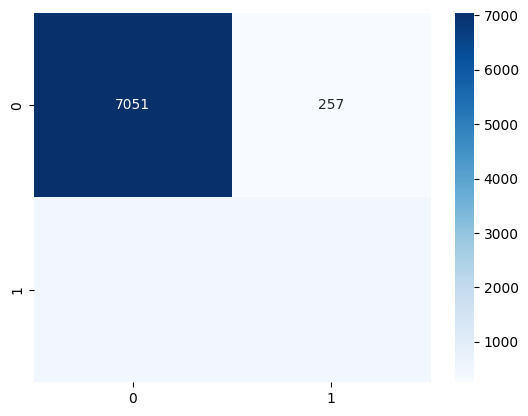

In [88]:
cm = pd.DataFrame(confusion_matrix(y_validation,y_prd_validation))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

In [89]:
# binary precision
tp/(tp+fp)

0.6430555555555556

In [90]:
# micro precision
((tp+tn)/(tp+fp+tn+fn))

0.9123360854783875

In [91]:
# macro precision
(tp/(tp+fp) + tn/(tn+fn))/2

0.7905937703270061

In [93]:
def plot_roc_auc(y_true, y_prd_proba):
  fpr, tpr, _ = roc_curve(y_true,  y_prd_proba)
  auc = roc_auc_score(y_true, y_prd_proba)
  plt.figure(figsize=(7,7))
  plt.plot(fpr,tpr,label="auc="+str(auc))
  plt.legend(loc=4)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

In [97]:
def model_learning_with_randomsearch(model, hyper_parameter, X, Y, metric="f1_macro"):
  random_cv_opt = RandomizedSearchCV(estimator=model, param_distributions=hyper_parameter, n_iter=n_iter_randomsearch, cv = cv, random_state=42, scoring=metric, verbose=1)
  random_cv_opt.fit(X, Y)
  y_prd = random_cv_opt.predict(X_validation)
  prf_score = precision_recall_fscore_support(y_validation, y_prd, average="macro")
  y_prd_proba = random_cv_opt.predict_proba(X_validation)[:,-1]
  score = roc_auc_score(y_validation, y_prd_proba, average='macro')
  print('validation -> best model hyper-parameter : ', random_cv_opt.best_params_)
  print("validation -> precision, recall, f1score : ", prf_score)
  print("validation -> roc_auc_score : ", score)

  cm = pd.DataFrame(confusion_matrix(y_validation,y_prd))
  sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

  return random_cv_opt.best_params_, prf_score, score

In [98]:
hyper_params_mlp = {
    'hidden_layer_sizes': [10, 15, 20, 25],
    'activation': ['tanh', 'relu'],
    'solver': ["sgd", "adam"],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01],
    'power_t': [0.5],
    'alpha': [0.0001],
    'max_iter': [10000],
    'early_stopping': [True],
    'warm_start': [False]
              }

params, prf_score, score = model_learning_with_randomsearch(MLPClassifier(), hyper_params_mlp, X_train, y_train)
list_model_type.append("model optimization with base feature")
list_model_best_params.append(params)
list_model_f1_score.append(prf_score[2])

c:\Users\TaeyoonKim\bank-customer-marketing-target\.venv\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 32 is smaller than n_iter=40. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits
